# Decision tree classifier

In [1]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
class Node:
    '''
    the class representing a single node in a decision tree
    '''
    def __init__(self, depth, X=None, y=None):
        '''
        isleaf : a Boolean variable indicating whether the node is a leaf node or not.
        depth : the depth of the node
        X : the indices of data set associated with the nodes (to be splitted by the node)
        y : label associated with the data
        feature : the index of axis by which the node separate data
        thresh : the threshold $\theta$ of splitting applied to the feature.
        label : the most frequent class in the points associated with the node.
        left : the left child node of the node
        right : the right child node of the node
        '''
        self.isleaf = None
        self.depth = depth
        self.X = X
        self.y = y
        self.n, self.m = np.shape(self.X)
        self.feature = None
        self.thresh = None
        self.label = np.argmax(np.bincount(y))
        self.left = None
        self.right = None
        
        
    def impurity(self, y, criterion):
        '''
        The method calculates the impurity criterion (entropy or gini) for a given label array y.
        '''
        
        ##################
        # your code here #

        # Description de np.lincount : pour une liste d'entiers, renvoie une liste d'effectifs : [0,0,1,5] renvoie [2,1,0,0,0,1]
        effectifs = np.bincount(y)
        probabilites = effectifs/np.sum(effectifs)
        if criterion == "entropy" or criterion == "e":
            probabilites[probabilites == 0] = 1
            impurete = - np.sum(probabilites * np.log(probabilites))
        elif criterion == "gini" or criterion == "g":
            impurete = np.sum(probabilites * (1 - probabilites))
        else:
            print("Critère non existant, taper \"entropy\" ou \"gini\"")
        return impurete
        

        ##################
            
            
    def calc_impurity_splitted(self, y_left, y_right, criterion):
        '''
        The method calculates the impurity criterion after the splitting, where the values is given by weighted sum of impurity indices of two regions.
        '''
        
        ##################
        # your code here #

        effectifs_left = np.bincount(y_left)
        effectifs_right = np.bincount(y_right)
        return (1/(np.sum(effectifs_left) + np.sum(effectifs_right))) * (np.sum(effectifs_left) * self.impurity(y_left, criterion) + np.sum(effectifs_right) * self.impurity(y_right, criterion))

        ##################
        
    
    def find_best_split(self, criterion):
        
        best_feature = None
        best_thresh = None
        
        ##################
        # your code here #

        # Correction prof
        val = float("inf")
        for feature in range(self.m):
            sort_ind = np.argsort(self.X[:,feature])
            X_sorted = self.X[sort_ind]
            y_sorted = self.y[sort_ind]
            for i in range(1, self.n):
                
                y_left = y_sorted[:i]
                y_right = y_sorted[i:]
                tmp_val = self.calc_impurity_splitted(y_left, y_right, criterion)
                if tmp_val < val:
                    val = tmp_val
                    best_feature = feature
                    best_thresh = (X_sorted[i-1, feature] + X_sorted[i, feature]) / 2

        ##################
        
        self.feature = best_feature
        self.thresh = best_thresh
        print(self.thresh)
    
    def split(self, max_depth, min_samples_split, criterion):
        '''
        The method splits data points recursively, where the splitting is based on the feature and threshold given by the result of find_best_split
        '''
        
        ##################
        # your code here #

        # correction prof
        if len(self.y) < min_samples_split:
            self.isleaf = True
        elif self.depth >= max_depth:
            self.isleaf = True
        elif len(np.unique(self.y)) <= 1:
            self.isleaf = True
        else:
            self.isleaf = False
            self.find_best_split(criterion)
            left_ind = np.where(self.X[:, self.feature] < self.thresh)
            right_ind = np.where(self.X[:, self.feature] >= self.thresh)
            self.left = Node(depth = self.depth + 1, X = self.X[left_ind], y = self.y[left_ind])
            self.right = Node(depth = self.depth + 1, X = self.X[right_ind], y = self.y[right_ind])
            self.left.split(max_depth, min_samples_split, criterion)
            self.right.split(max_depth, min_samples_split, criterion)

        ##################
        
            
    def judge(self, x):
        '''
        This recursive method makes prediction as to which class the input x falls into. If the node is not a leaf (self.isleaf==False), then it will descend the tree to ask sub-nodes.
        '''
        if self.isleaf:
            return self.label
        else:
            if x[self.feature] < self.thresh:
                return self.left.judge(x)
            else:
                return self.right.judge(x)

In [49]:
class DecisionTreeClassifier:
    def __init__(self, max_depth, min_samples_split, criterion):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
    
    def fit(self, X, y):
        self.root_node = Node(depth=0, X=X, y=y)
        self.root_node.split(max_depth=self.max_depth, min_samples_split=self.min_samples_split, criterion=self.criterion)
        return self
        
    def predict(self, X):
        y = np.zeros(len(X), dtype='int')
        for i in range(len(X)):
            y[i] = self.root_node.judge(X[i])
        return y

# Experiment

In [50]:
from sklearn import datasets

N = 100
X, y = datasets.make_moons(n_samples = N, noise = 0.2)

xx1 = np.linspace(np.min(X[:,0]),np.max(X[:,0]),101)
xx2 = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
Xtest = np.array([[x1,x2] for x1 in xx1  for x2 in xx2])
xxx1, xxx2 = np.meshgrid(xx1, xx2)

def plot_result(clf):
    plt.plot(X[:,0][y==1], X[:,1][y==1],"o",label="1")
    plt.plot(X[:,0][y==0], X[:,1][y==0],"o",label="0")
    plt.legend()
    pred_val = clf.predict(Xtest)
    pred_val_2D = np.reshape(pred_val,(len(xx1),len(xx2))).T
    plt.pcolormesh(xxx1, xxx2, pred_val_2D, shading='auto')
    plt.colorbar()
    plt.show()

0.2167593703346192
-0.4607205975573856
-0.01656399316843679
0.08217369430646744
1.3410588147111753
1.4746261531576978
0.7360950475268284
-0.7219028139287522
0.4128083308375853
0.09761691832442485
-0.661932075456464
0.7281912499505816


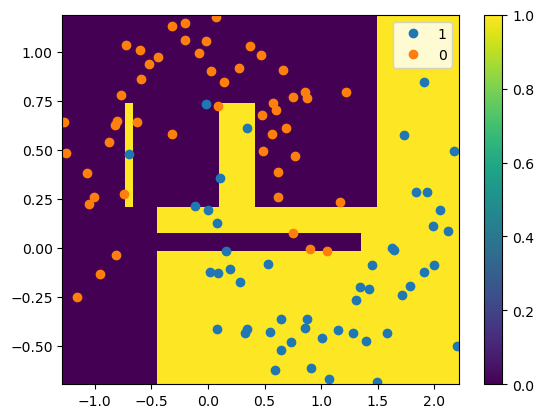

In [51]:
dtc = DecisionTreeClassifier(max_depth=40, min_samples_split=2, criterion='entropy')
dtc.fit(X, y)
plot_result(dtc)